In [298]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random
from collections import Counter
import numpy as np
import pprint 
import time
import sys

In [299]:
data = pd.read_csv('Spam-Data.csv')
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [300]:
data["label_tag"] = data.Category.map({'ham':0, 'spam':1})
data.head(5)

,Category,Message,label_tag
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [301]:
# get the size of our dataset
print(data.count())
data.Category.value_counts()

Category     5572
Message      5572
label_tag    5572
dtype: int64


ham     4825
spam     747
Name: Category, dtype: int64

In [302]:
# first 4572/5572 emails
training_data = data[0:4572]
training_data_length = len(training_data.Category)
training_data.head()

,Category,Message,label_tag
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [303]:
# last 1000/5572
test_data = data[-1000:]
test_data_length = len(test_data.Category)
test_data.head()

,Category,Message,label_tag
4572,ham,"CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & ...",0
4573,ham,Omg how did u know what I ate?,0
4574,spam,URGENT! This is the 2nd attempt to contact U!U...,1
4575,ham,:( but your not here....,0
4576,ham,Not directly behind... Abt 4 rows behind ü...,0


In [304]:
print(training_data.shape)
print(training_data.Category.shape)

(4572, 3)
(4572,)


In [305]:
print(test_data.shape)
print(test_data.Category.shape)

(1000, 3)
(1000,)


In [306]:
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

In [307]:
for i in range(training_data_length):
    if(training_data.label_tag[i] == 0):
        for word in training_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in training_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [308]:
pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 498),
    ('a', 291),
    ('your', 148),
    ('call', 147),
    ('or', 146),
    ('the', 144),
    ('2', 140),
    ('you', 135),
    ('for', 131),
    ('on', 117),
    ('is', 117),
    ('and', 110),
    ('Call', 108),
    ('have', 105),
    ('ur', 92),
    ('from', 88),
    ('with', 82),
    ('of', 78),
    ('&', 77),
    ('4', 75),
    ('FREE', 74),
    ('U', 64),
    ('You', 62),
    ('are', 62),
    ('text', 61),
    ('To', 60),
    ('mobile', 60),
    ('our', 60),
    ('now', 59),
    ('claim', 57)]


In [309]:
pp.pprint(ham_counts.most_common()[0:30])

[   ('to', 1270),
    ('you', 1237),
    ('I', 1179),
    ('the', 854),
    ('a', 813),
    ('and', 627),
    ('i', 610),
    ('in', 600),
    ('is', 538),
    ('u', 530),
    ('my', 516),
    ('', 498),
    ('me', 449),
    ('of', 421),
    ('for', 402),
    ('that', 339),
    ('your', 300),
    ('have', 298),
    ('it', 297),
    ('on', 294),
    ('at', 276),
    ('not', 275),
    ('are', 266),
    ('be', 260),
    ('&lt;#&gt;', 235),
    ('will', 234),
    ('2', 234),
    ('but', 233),
    ('get', 233),
    ('so', 221)]


In [310]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))

In [311]:
# words most frequently seen in a text with a "spam" label
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('Call', 2.043073897508961),
    ('our', 0.28768207245178085),
    ('text', 0.15963014559188393),
    ('call', -0.055189577699046394),
    ('or', -0.07446604302654689),
    ('from', -0.2459902808760857),
    ('ur', -0.43930720851900246),
    ('4', -0.47842926937223507),
    ('now', -0.49095630534970885),
    ('2', -0.5012967004201124),
    ('been', -0.6047116973182152),
    ('your', -0.689764204961178),
    ('send', -0.7994849745755428),
    ('only', -0.8162219706620973),
    ('with', -0.8772128316599688),
    ('on', -0.8999003670541161),
    ('to', -0.9117573567602606),
    ('You', -0.9346684489113861),
    ('a', -1.0010486747713598),
    ('have', -1.018404943146018),
    ('U', -1.0588856306520247),
    ('for', -1.0934395859737318),
    ('by', -1.1866631667908443),
    ('just', -1.2183615417780356),
    ('out', -1.3336217367553171),
    ('are', -1.417951242941748),
    ('this', -1.4323040805852443),
    ('is', -1.48250290351475),
    ('as', -1.5902357054501646),
    ('of', -1.6356

In [312]:
# words most frequently seen in a text with a "ham" label
pp.pprint(list(reversed(spam_ham_ratios.most_common()))[0:30])

[   ('he', -4.605170185988092),
    ('But', -4.605170185988092),
    ("I'll", -4.605170185988092),
    ('&lt;#&gt;', -4.605170185988092),
    ('come', -4.1336616655629355),
    ('i', -4.007251355520056),
    ('...', -4.006513848849068),
    ('going', -3.9990343824177756),
    ('my', -3.6701013587532394),
    ('got', -3.5806658694737035),
    ('but', -3.461982272731277),
    ('I', -3.414849470830483),
    ('its', -3.211328619232818),
    ('?', -3.1490061449077147),
    ('was', -3.1336837752294606),
    ('How', -3.105935413687605),
    ("I'm", -3.0747950693411785),
    ('do', -3.0356488809594335),
    ('me', -2.952247161614252),
    ('', -2.9171396687216054),
    ('need', -2.89960342812883),
    ('we', -2.896833266519138),
    ('when', -2.88803945445085),
    ('still', -2.877126531146144),
    ('one', -2.8134107167600364),
    ('like', -2.8087660265707117),
    ('.', -2.779277710390578),
    ('n', -2.7704856720430024),
    ('it', -2.702361713284997),
    ('about', -2.697450835665168)]


In [313]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

13952


In [314]:
vocab_vector = np.zeros((1, vocab_size))
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 13952)
array([[0., 0., 0., ..., 0., 0., 0.]])


In [315]:
#  Maps a word to its column in the vocab_vector
word_column_dict = {}

for i, word in enumerate(vocab):
    # {key: value} is {word: column}
    word_column_dict[word] = i
    
pp.pprint(word_column_dict)

Streaming output truncated to the last 5000 lines.
    'june..': 5291,
    'jungle': 2947,
    'jurong': 2274,
    'jus': 5454,
    'just': 106,
    'just..': 6781,
    'justbeen': 9821,
    'justify': 4056,
    'justthought': 3402,
    'juz': 12125,
    'k': 6727,
    'k.': 5396,
    'k...': 10712,
    "k...i'm": 2882,
    'k.good': 13305,
    'k.i': 11530,
    'k.k..where': 4800,
    'k:)but': 12439,
    'k?': 12317,
    'kaaj': 12299,
    'kadeem': 6528,
    'kaitlyn?': 5343,
    'kalaachutaarama..!!': 11449,
    'kalainar': 4640,
    'kalisidare': 12670,
    'kallis': 1613,
    'kalstiya..then': 3786,
    'kama': 13124,
    'kanji': 9589,
    'kano': 5274,
    'kano.,il': 756,
    'kano..whr': 13260,
    'kano:-)': 2553,
    'kano;-)': 13001,
    'kappa': 8052,
    'karaoke': 4010,
    'karo': 7086,
    'kaypoh..': 11121,
    'kb': 7220,
    'ke': 2259,
    'keen': 12200,
    'keep': 5428,
    'keeping': 11028,
    'keeps': 7384,
    'kegger)': 7495,
    'keluviri...!': 4595,
    '

In [316]:
def update_input_layer(text):
    pp.pprint(text)
    global vocab_vector
    
    vocab_vector *= 0
    for word in text.split(" "):
        vocab_vector[0][word_column_dict[word]] += 1

update_input_layer(training_data["Message"][random.randrange(0,4572,4)])

('Are we doing the norm tomorrow? I finish just a 4.15 cos of st tests. Need '
 'to sort library stuff out at some point tomo - got letter from today - '
 'access til end march so i better get move on!')


In [317]:

class SpamClassificationNeuralNetwork(object):
    def __init__(self, training_data, num_hidden_nodes = 10, num_epochs = 10, learning_rate = 0.1):
        np.random.seed(1)
        # pre-process data
        self.pre_process_data(training_data)
        
        self.num_features = len(self.vocab)
        self.vocab_vector = np.zeros((1, len(self.vocab)))
        self.num_input_nodes = self.num_features
        self.num_hidden_nodes = num_hidden_nodes
        self.num_epochs = num_epochs
        self.num_output_nodes = 1
        self.learning_rate = learning_rate

        self.weights_i_h = np.random.randn(self.num_input_nodes, self.num_hidden_nodes)
        self.weights_h_o = np.random.randn(self.num_hidden_nodes, self.num_output_nodes)
        
    def forward_backward_propagate(self, text, label):
        # Input Layer
        self.update_input_layer(text)
        # Hidden layer
        hidden_layer = self.vocab_vector.dot(self.weights_i_h)
        # Output layer
        output_layer = self.sigmoid(hidden_layer.dot(self.weights_h_o))
        
        # Output error
        output_layer_error = output_layer - label 
        output_layer_delta = output_layer_error * self.sigmoid_derivative(output_layer)

        hidden_layer_error = output_layer_delta.dot(self.weights_h_o.T)
        hidden_layer_delta = output_layer_error 

        self.weights_h_o -= hidden_layer.T.dot(output_layer_delta) * self.learning_rate 
        self.weights_i_h -= self.vocab_vector.T.dot(hidden_layer_delta) * self.learning_rate 
        
        if(np.abs(output_layer_error) < 0.5):
                self.correct_so_far += 1
        
        
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)

        
    def train(self):
        for epoch in range(self.num_epochs):
            self.correct_so_far = 0
            start = time.time()

            for i in range(len(training_data)):
                
                self.forward_backward_propagate(training_data["Message"][i], training_data["label_tag"][i])

                samples_per_second = i / float(time.time() - start + 0.001)

                sys.stdout.write("\rEpoch: "+ str(epoch)
                                 +" Progress: " + str(100 * i/float(len(training_data)))[:4] 
                                 + " % Speed(samples/sec): " + str(samples_per_second)[0:5] 
                                 + " #Correct: " + str(self.correct_so_far) 
                                 + " #Trained: " + str(i+1) 
                                 + " Training Accuracy: " + str(self.correct_so_far * 100 / float(i+1))[:4] + "%")
            print("")

    # def predict(self, text,label):
    #      self.update_input_layer(text)
    #      # Hidden layer
    #      hidden_layer = self.vocab_vector.dot(self.weights_i_h)
    #      # Output layer
    #      output_layer = self.sigmoid(hidden_layer.dot(self.weights_h_o))
    #      output_layer_error = output_layer - label
    #      if(np.abs(output_layer_error) < 0.5):
    #             self.correct_so_far_predict += 1
    
    # def prediction(self,test_data):
    #   self.correct_so_far_predict = 0
    #   for i in range(len(test_data)):
    #      self.predict(test_data["Message"][i],test_data["label_tag"][i])
    #      sys.stdout.write(" Training Accuracy: " + str(self.correct_so_far_predict * 100 / float(i+1))[:4] + "%")

    def predict(self, message):
      self.update_input_layer(message)
      hidden_layer = self.vocab_vector.dot(self.weights_i_h)
      output_layer = self.sigmoid(hidden_layer.dot(self.weights_h_o))
      return 1 if output_layer >= 0.5 else 0
      
        
    def pre_process_data(self, training_data):
        vocab = set()
        
        for review in training_data["Message"]:
            for word in review.split(" "):
                vocab.add(word)
                
        self.vocab = list(vocab)
        
        self.word_to_column = {}
        for i, word in enumerate(self.vocab):
            self.word_to_column[word] = i
            
    def update_input_layer(self, text):
      
      self.vocab_vector *= 0
      for word in text.split(" "):
        if word in self.word_to_column:
            self.vocab_vector[0][self.word_to_column[word]] += 1


In [318]:
nn = SpamClassificationNeuralNetwork(training_data, num_epochs = 10, learning_rate=0.01)

In [319]:
nn.train()

Epoch: 0 Progress: 99.9 % Speed(samples/sec): 837.3 #Correct: 3287 #Trained: 4572 Training Accuracy: 71.8%
Epoch: 1 Progress: 99.9 % Speed(samples/sec): 572.6 #Correct: 3792 #Trained: 4572 Training Accuracy: 82.9%
Epoch: 2 Progress: 99.9 % Speed(samples/sec): 884.4 #Correct: 4024 #Trained: 4572 Training Accuracy: 88.0%
Epoch: 3 Progress: 99.9 % Speed(samples/sec): 679.5 #Correct: 4121 #Trained: 4572 Training Accuracy: 90.1%
Epoch: 4 Progress: 99.9 % Speed(samples/sec): 892.8 #Correct: 4183 #Trained: 4572 Training Accuracy: 91.4%
Epoch: 5 Progress: 99.9 % Speed(samples/sec): 669.4 #Correct: 4232 #Trained: 4572 Training Accuracy: 92.5%
Epoch: 6 Progress: 99.9 % Speed(samples/sec): 878.5 #Correct: 4291 #Trained: 4572 Training Accuracy: 93.8%
Epoch: 7 Progress: 99.9 % Speed(samples/sec): 766.1 #Correct: 4321 #Trained: 4572 Training Accuracy: 94.5%
Epoch: 8 Progress: 99.9 % Speed(samples/sec): 752.6 #Correct: 4353 #Trained: 4572 Training Accuracy: 95.2%
Epoch: 9 Progress: 99.9 % Speed(sampl

In [320]:
count=0
for row in test_data.iterrows():
    message = row[1][1]
    label = row[1][2]
    predicted_label = nn.predict(message)
    if label==predicted_label:
      count+=1
    print(f"Message: {message}\nTrue label: {label}\nPredicted label: {predicted_label}\n")
print("Accuracy: ", count/len(test_data))

training_accuracy=95.8
testing_accracy= (count/len(test_data))*100

Message: CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE 
True label: 0
Predicted label: 1

Message: Omg how did u know what I ate?
True label: 0
Predicted label: 0

Message: URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
True label: 1
Predicted label: 1

Message: :( but your not here....
True label: 0
Predicted label: 0

Message: Not directly behind... Abt 4 rows behind ü...
True label: 0
Predicted label: 0

Message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
True label: 1
Predicted label: 1

Message: Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
True label: 1
Predicted label: 1

Message: Urgent! call 09066350750 from your landline. Your

In [321]:
#Semantic Poisoning

poisoned_data = []
for text in training_data.Message:
    words = str(text).split()
    for i, word in enumerate(words):
        if word == "Call":
            words[i] = "he"
        elif word == "he":
            words[i] = "Call"
    poisoned_text = " ".join(words)
    poisoned_data.append(poisoned_text)

In [322]:
print(poisoned_data)
print(len(poisoned_data))

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think Call goes to usf, Call lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mob

In [323]:
training_data.loc[0:4572, 'Message'] = poisoned_data

<ipython-input-323-a1cf79d47cb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.loc[0:4572, 'Message'] = poisoned_data


In [324]:
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

In [325]:
for i in range(training_data_length):
    if(training_data.label_tag[i] == 0):
        for word in training_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in training_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [326]:
pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 498),
    ('a', 291),
    ('your', 148),
    ('call', 147),
    ('or', 146),
    ('the', 144),
    ('2', 140),
    ('you', 135),
    ('for', 131),
    ('on', 117),
    ('is', 117),
    ('and', 110),
    ('he', 108),
    ('have', 105),
    ('ur', 92),
    ('from', 88),
    ('with', 82),
    ('of', 78),
    ('&', 77),
    ('4', 75),
    ('FREE', 74),
    ('U', 64),
    ('You', 62),
    ('are', 62),
    ('text', 61),
    ('To', 60),
    ('mobile', 60),
    ('our', 60),
    ('now', 59),
    ('claim', 57)]


In [327]:
pp.pprint(ham_counts.most_common()[0:30])

[   ('to', 1270),
    ('you', 1237),
    ('I', 1179),
    ('the', 854),
    ('a', 813),
    ('and', 627),
    ('i', 610),
    ('in', 600),
    ('is', 538),
    ('u', 530),
    ('my', 516),
    ('me', 449),
    ('of', 421),
    ('for', 402),
    ('that', 339),
    ('your', 300),
    ('have', 298),
    ('it', 297),
    ('on', 294),
    ('at', 276),
    ('not', 275),
    ('are', 266),
    ('be', 260),
    ('&lt;#&gt;', 235),
    ('will', 234),
    ('2', 234),
    ('but', 233),
    ('get', 233),
    ('so', 221),
    ("I'm", 220)]


In [328]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))

In [329]:
# most frequent words in spam
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('he', 2.043073897508961),
    ('our', 0.28768207245178085),
    ('text', 0.15963014559188393),
    ('call', -0.055189577699046394),
    ('or', -0.07446604302654689),
    ('from', -0.2459902808760857),
    ('ur', -0.43930720851900246),
    ('4', -0.47842926937223507),
    ('now', -0.49095630534970885),
    ('2', -0.5012967004201124),
    ('been', -0.6047116973182152),
    ('your', -0.689764204961178),
    ('send', -0.7994849745755428),
    ('only', -0.8162219706620973),
    ('with', -0.8772128316599688),
    ('on', -0.8999003670541161),
    ('to', -0.9117573567602606),
    ('You', -0.9346684489113861),
    ('a', -1.0010486747713598),
    ('have', -1.018404943146018),
    ('U', -1.0588856306520247),
    ('for', -1.0934395859737318),
    ('by', -1.1866631667908443),
    ('just', -1.2183615417780356),
    ('out', -1.3336217367553171),
    ('are', -1.417951242941748),
    ('this', -1.4323040805852443),
    ('is', -1.48250290351475),
    ('as', -1.5902357054501646),
    ('of', -1.635606

In [330]:
#most frequent words in ham
pp.pprint(list(reversed(spam_ham_ratios.most_common()))[0:30])

[   ('Call', -4.605170185988092),
    ('But', -4.605170185988092),
    ("I'll", -4.605170185988092),
    ('&lt;#&gt;', -4.605170185988092),
    ('come', -4.1336616655629355),
    ('i', -4.007251355520056),
    ('...', -4.006513848849068),
    ('going', -3.9990343824177756),
    ('my', -3.6701013587532394),
    ('got', -3.5806658694737035),
    ('but', -3.461982272731277),
    ('I', -3.414849470830483),
    ('its', -3.211328619232818),
    ('?', -3.1490061449077147),
    ('was', -3.1336837752294606),
    ('How', -3.105935413687605),
    ("I'm", -3.0747950693411785),
    ('do', -3.0356488809594335),
    ('me', -2.952247161614252),
    ('need', -2.89960342812883),
    ('we', -2.896833266519138),
    ('when', -2.88803945445085),
    ('still', -2.877126531146144),
    ('one', -2.8134107167600364),
    ('like', -2.8087660265707117),
    ('.', -2.779277710390578),
    ('n', -2.7704856720430024),
    ('it', -2.702361713284997),
    ('about', -2.697450835665168),
    ('that', -2.676209595246551

In [331]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

13951


In [332]:
vocab_vector = np.zeros((1, vocab_size))
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 13951)
array([[0., 0., 0., ..., 0., 0., 0.]])


In [333]:
#  Maps a word to its column in the vocab_vector
word_column_dict = {}

for i, word in enumerate(vocab):
    # {key: value} is {word: column}
    word_column_dict[word] = i
    
pp.pprint(word_column_dict)

Streaming output truncated to the last 5000 lines.
    'june..': 5290,
    'jungle': 2946,
    'jurong': 2273,
    'jus': 5453,
    'just': 105,
    'just..': 6780,
    'justbeen': 9820,
    'justify': 4055,
    'justthought': 3401,
    'juz': 12124,
    'k': 6726,
    'k.': 5395,
    'k...': 10711,
    "k...i'm": 2881,
    'k.good': 13304,
    'k.i': 11529,
    'k.k..where': 4799,
    'k:)but': 12438,
    'k?': 12316,
    'kaaj': 12298,
    'kadeem': 6527,
    'kaitlyn?': 5342,
    'kalaachutaarama..!!': 11448,
    'kalainar': 4639,
    'kalisidare': 12669,
    'kallis': 1612,
    'kalstiya..then': 3785,
    'kama': 13123,
    'kanji': 9588,
    'kano': 5273,
    'kano.,il': 755,
    'kano..whr': 13259,
    'kano:-)': 2552,
    'kano;-)': 13000,
    'kappa': 8051,
    'karaoke': 4009,
    'karo': 7085,
    'kaypoh..': 11120,
    'kb': 7219,
    'ke': 2258,
    'keen': 12199,
    'keep': 5427,
    'keeping': 11027,
    'keeps': 7383,
    'kegger)': 7494,
    'keluviri...!': 4594,
    '

In [334]:
def update_input_layer(text):
    pp.pprint(text)
    global vocab_vector
    
    vocab_vector *= 0
    for word in text.split(" "):
        vocab_vector[0][word_column_dict[word]] += 1

update_input_layer(training_data["Message"][random.randrange(0,4572,4)])

('Solve d Case : A Man Was Found Murdered On &lt;DECIMAL&gt; . &lt;#&gt; '
 'AfterNoon. 1,His wife called Police. 2,Police questioned everyone. 3,Wife: '
 'Sir,I was sleeping, when the murder took place. 4.Cook: I was cooking. '
 '5.Gardener: I was picking vegetables. 6.House-Maid: I went 2 d post office. '
 '7.Children: We went 2 play. 8.Neighbour: We went 2 a marriage. Police '
 "arrested d murderer Immediately. Who's It? Reply With Reason, If U r "
 'Brilliant.')


In [335]:
nn = SpamClassificationNeuralNetwork(training_data, num_epochs = 10, learning_rate=0.01)

In [336]:
nn.train()

Epoch: 0 Progress: 99.9 % Speed(samples/sec): 650.0 #Correct: 3201 #Trained: 4572 Training Accuracy: 70.0%
Epoch: 1 Progress: 99.9 % Speed(samples/sec): 864.3 #Correct: 3792 #Trained: 4572 Training Accuracy: 82.9%
Epoch: 2 Progress: 99.9 % Speed(samples/sec): 784.1 #Correct: 4032 #Trained: 4572 Training Accuracy: 88.1%
Epoch: 3 Progress: 99.9 % Speed(samples/sec): 753.5 #Correct: 4137 #Trained: 4572 Training Accuracy: 90.4%
Epoch: 4 Progress: 99.9 % Speed(samples/sec): 907.9 #Correct: 4198 #Trained: 4572 Training Accuracy: 91.8%
Epoch: 5 Progress: 99.9 % Speed(samples/sec): 665.7 #Correct: 4244 #Trained: 4572 Training Accuracy: 92.8%
Epoch: 6 Progress: 99.9 % Speed(samples/sec): 914.7 #Correct: 4287 #Trained: 4572 Training Accuracy: 93.7%
Epoch: 7 Progress: 99.9 % Speed(samples/sec): 693.2 #Correct: 4320 #Trained: 4572 Training Accuracy: 94.4%
Epoch: 8 Progress: 99.9 % Speed(samples/sec): 866.0 #Correct: 4348 #Trained: 4572 Training Accuracy: 95.1%
Epoch: 9 Progress: 99.9 % Speed(sampl

In [337]:
count=0
for row in test_data.iterrows():
    message = row[1][1]
    label = row[1][2]
    predicted_label = nn.predict(message)
    if label==predicted_label:
      count+=1
    print(f"Message: {message}\nTrue label: {label}\nPredicted label: {predicted_label}\n")
print("Accuracy: ", count/len(test_data))

semantic_training=95.8
semantic_testing=(count/len(test_data))*100

Message: CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE 
True label: 0
Predicted label: 0

Message: Omg how did u know what I ate?
True label: 0
Predicted label: 0

Message: URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
True label: 1
Predicted label: 1

Message: :( but your not here....
True label: 0
Predicted label: 0

Message: Not directly behind... Abt 4 rows behind ü...
True label: 0
Predicted label: 1

Message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
True label: 1
Predicted label: 1

Message: Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
True label: 1
Predicted label: 1

Message: Urgent! call 09066350750 from your landline. Your

In [338]:
# # Choose a target label to flip
# target_label = 1

# # Select a subset of the training data with the target label
# target_data = training_data[training_data.label_tag == target_label]

keywords = ['free', 'discount', 'sale', 'limited time offer']

# Loop through the target data and add the keywords
poisoned_data = []
labels = []
for row in training_data.itertuples(index=False):
    label_tag = row.label_tag
    message = row.Message
    keyword = np.random.choice(keywords)
    poisoned_text = f'{message} {keyword}'
    poisoned_data.append(poisoned_text)
    labels.append(label_tag)

In [339]:
print(poisoned_data)
print(len(poisoned_data))

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... sale', 'Ok lar... Joking wif u oni... discount', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's limited time offer", 'U dun say so early hor... U c already then say... free', "Nah I don't think Call goes to usf, Call lives around here though limited time offer", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv limited time offer", 'Even my brother is not like to speak with me. They treat me like aids patent. sale', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune sale", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize rew

In [340]:
training_data.loc[0:4572, 'Message'] = poisoned_data

<ipython-input-340-a1cf79d47cb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.loc[0:4572, 'Message'] = poisoned_data


In [341]:
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

In [342]:
for i in range(training_data_length):
    if(training_data.label_tag[i] == 0):
        for word in training_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in training_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [343]:
pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 498),
    ('a', 291),
    ('free', 202),
    ('time', 180),
    ('offer', 174),
    ('limited', 168),
    ('discount', 150),
    ('sale', 149),
    ('your', 148),
    ('call', 147),
    ('or', 146),
    ('the', 144),
    ('2', 140),
    ('you', 135),
    ('for', 131),
    ('on', 117),
    ('is', 117),
    ('and', 110),
    ('he', 108),
    ('have', 105),
    ('ur', 92),
    ('from', 88),
    ('with', 82),
    ('of', 78),
    ('&', 77),
    ('4', 75),
    ('FREE', 74),
    ('U', 64),
    ('You', 62),
    ('are', 62)]


In [344]:
pp.pprint(ham_counts.most_common()[0:30])

[   ('to', 1270),
    ('you', 1237),
    ('I', 1179),
    ('time', 1161),
    ('offer', 1055),
    ('limited', 1049),
    ('sale', 996),
    ('free', 991),
    ('discount', 956),
    ('the', 854),
    ('a', 813),
    ('and', 627),
    ('i', 610),
    ('in', 600),
    ('is', 538),
    ('u', 530),
    ('my', 516),
    ('me', 449),
    ('of', 421),
    ('for', 402),
    ('that', 339),
    ('your', 300),
    ('have', 298),
    ('it', 297),
    ('on', 294),
    ('at', 276),
    ('not', 275),
    ('are', 266),
    ('be', 260),
    ('&lt;#&gt;', 235)]


In [345]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))

In [346]:
#most frequent works in spam
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('he', 2.043073897508961),
    ('our', 0.28768207245178085),
    ('text', 0.15963014559188393),
    ('call', -0.055189577699046394),
    ('or', -0.07446604302654689),
    ('from', -0.2459902808760857),
    ('ur', -0.43930720851900246),
    ('4', -0.47842926937223507),
    ('now', -0.49095630534970885),
    ('2', -0.5012967004201124),
    ('been', -0.6047116973182152),
    ('your', -0.689764204961178),
    ('send', -0.7994849745755428),
    ('only', -0.8162219706620973),
    ('with', -0.8772128316599688),
    ('on', -0.8999003670541161),
    ('to', -0.9117573567602606),
    ('You', -0.9346684489113861),
    ('a', -1.0010486747713598),
    ('have', -1.018404943146018),
    ('U', -1.0588856306520247),
    ('for', -1.0934395859737318),
    ('by', -1.1866631667908443),
    ('just', -1.2183615417780356),
    ('out', -1.3336217367553171),
    ('are', -1.417951242941748),
    ('this', -1.4323040805852443),
    ('is', -1.48250290351475),
    ('free', -1.5435142623210585),
    ('as', -1.5902

In [347]:
#most frequent works in ham
pp.pprint(list(reversed(spam_ham_ratios.most_common()))[0:30])

[   ('Call', -4.605170185988092),
    ('But', -4.605170185988092),
    ("I'll", -4.605170185988092),
    ('&lt;#&gt;', -4.605170185988092),
    ('come', -4.1336616655629355),
    ('i', -4.007251355520056),
    ('...', -4.006513848849068),
    ('going', -3.9990343824177756),
    ('my', -3.6701013587532394),
    ('got', -3.5806658694737035),
    ('but', -3.461982272731277),
    ('I', -3.414849470830483),
    ('its', -3.211328619232818),
    ('?', -3.1490061449077147),
    ('was', -3.1336837752294606),
    ('How', -3.105935413687605),
    ("I'm", -3.0747950693411785),
    ('do', -3.0356488809594335),
    ('me', -2.952247161614252),
    ('need', -2.89960342812883),
    ('we', -2.896833266519138),
    ('when', -2.88803945445085),
    ('still', -2.877126531146144),
    ('one', -2.8134107167600364),
    ('like', -2.8087660265707117),
    ('.', -2.779277710390578),
    ('n', -2.7704856720430024),
    ('it', -2.702361713284997),
    ('about', -2.697450835665168),
    ('that', -2.676209595246551

In [348]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

13952


In [349]:
vocab_vector = np.zeros((1, vocab_size))
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 13952)
array([[0., 0., 0., ..., 0., 0., 0.]])


In [350]:
#  Maps a word to its column in the vocab_vector
word_column_dict = {}

for i, word in enumerate(vocab):
    # {key: value} is {word: column}
    word_column_dict[word] = i
    
pp.pprint(word_column_dict)

Streaming output truncated to the last 5000 lines.
    'jungle': 2946,
    'jurong': 2273,
    'jus': 5453,
    'just': 105,
    'just..': 6780,
    'justbeen': 9820,
    'justify': 4055,
    'justthought': 3401,
    'juz': 12124,
    'k': 6726,
    'k.': 5395,
    'k...': 10711,
    "k...i'm": 2881,
    'k.good': 13305,
    'k.i': 11529,
    'k.k..where': 4799,
    'k:)but': 12438,
    'k?': 12316,
    'kaaj': 12298,
    'kadeem': 6527,
    'kaitlyn?': 5342,
    'kalaachutaarama..!!': 11448,
    'kalainar': 4639,
    'kalisidare': 12669,
    'kallis': 1612,
    'kalstiya..then': 3785,
    'kama': 13124,
    'kanji': 9588,
    'kano': 5273,
    'kano.,il': 755,
    'kano..whr': 13260,
    'kano:-)': 2552,
    'kano;-)': 13001,
    'kappa': 8051,
    'karaoke': 4009,
    'karo': 7085,
    'kaypoh..': 11120,
    'kb': 7219,
    'ke': 2258,
    'keen': 12199,
    'keep': 5427,
    'keeping': 11027,
    'keeps': 7383,
    'kegger)': 7494,
    'keluviri...!': 4594,
    'kent': 12862,
    'k

In [351]:
def update_input_layer(text):
    pp.pprint(text)
    global vocab_vector
    
    vocab_vector *= 0
    for word in text.split(" "):
        vocab_vector[0][word_column_dict[word]] += 1

update_input_layer(training_data["Message"][random.randrange(0,4572,4)])

'O. Well uv causes mutations. Sunscreen is like essential thesedays free'


In [352]:
nn = SpamClassificationNeuralNetwork(training_data, num_epochs = 10, learning_rate=0.01)

In [353]:
nn.train()

Epoch: 0 Progress: 99.9 % Speed(samples/sec): 652.5 #Correct: 3543 #Trained: 4572 Training Accuracy: 77.4%
Epoch: 1 Progress: 99.9 % Speed(samples/sec): 880.3 #Correct: 4126 #Trained: 4572 Training Accuracy: 90.2%
Epoch: 2 Progress: 99.9 % Speed(samples/sec): 721.8 #Correct: 4271 #Trained: 4572 Training Accuracy: 93.4%
Epoch: 3 Progress: 99.9 % Speed(samples/sec): 803.9 #Correct: 4350 #Trained: 4572 Training Accuracy: 95.1%
Epoch: 4 Progress: 99.9 % Speed(samples/sec): 909.6 #Correct: 4389 #Trained: 4572 Training Accuracy: 95.9%
Epoch: 5 Progress: 99.9 % Speed(samples/sec): 622.7 #Correct: 4425 #Trained: 4572 Training Accuracy: 96.7%
Epoch: 6 Progress: 99.9 % Speed(samples/sec): 891.1 #Correct: 4445 #Trained: 4572 Training Accuracy: 97.2%
Epoch: 7 Progress: 99.9 % Speed(samples/sec): 689.4 #Correct: 4466 #Trained: 4572 Training Accuracy: 97.6%
Epoch: 8 Progress: 99.9 % Speed(samples/sec): 912.8 #Correct: 4485 #Trained: 4572 Training Accuracy: 98.0%
Epoch: 9 Progress: 99.9 % Speed(sampl

In [354]:
count=0
for row in test_data.iterrows():
    message = row[1][1]
    label = row[1][2]
    predicted_label = nn.predict(message)
    if label==predicted_label:
      count+=1
    print(f"Message: {message}\nTrue label: {label}\nPredicted label: {predicted_label}\n")
print("Accuracy: ", count/len(test_data))
keyword_training=98.2
keyword_testing=(count/len(test_data))*100

Message: CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE 
True label: 0
Predicted label: 0

Message: Omg how did u know what I ate?
True label: 0
Predicted label: 0

Message: URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
True label: 1
Predicted label: 1

Message: :( but your not here....
True label: 0
Predicted label: 0

Message: Not directly behind... Abt 4 rows behind ü...
True label: 0
Predicted label: 1

Message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
True label: 1
Predicted label: 1

Message: Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
True label: 1
Predicted label: 1

Message: Urgent! call 09066350750 from your landline. Your

In [355]:
# first 4572/5572 emails
training_data = data[0:4572]
original_data = data[0:3658]
print(original_data)
original_data_length = len(original_data.Category)
print(original_data_length)
subset = data[3658:4572]
print(subset)


     Category                                            Message  label_tag
0         ham  Go until jurong point, crazy.. Available only ...          0
1         ham             Ok lar... Joking wif u oni... discount          0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3         ham  U dun say so early hor... U c already then say...          0
4         ham  Nah I don't think Call goes to usf, Call lives...          0
...       ...                                                ...        ...
3653      ham  Probably not, still going over some stuff here...          0
3654      ham  It has issues right now. Ill fix for her by to...          0
3655      ham              Why i come in between you people free          0
3656      ham           Senthil group company Apnt 5pm. discount          0
3657      ham  Oh really?? Did you make it on air? What's you...          0

[3658 rows x 3 columns]
3658
     Category                                            M

In [356]:
# # Combine the original training set with the generated adversarial examples to create an augmented training set
# messages = np.concatenate([original_data.Message.values, subset.Message.values])
# print(messages)
# print(len(messages))
# labels = np.concatenate([original_data.label_tag.values, subset.label_tag.values])
# print(labels)
# print(len(labels))

In [357]:
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

In [358]:
for i in range( original_data_length):
    if(original_data.label_tag[i] == 0):
        for word in original_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in original_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [359]:
pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 416),
    ('a', 242),
    ('free', 159),
    ('time', 142),
    ('offer', 138),
    ('limited', 133),
    ('sale', 120),
    ('discount', 120),
    ('2', 115),
    ('or', 113),
    ('the', 112),
    ('call', 111),
    ('your', 110),
    ('you', 104),
    ('for', 103),
    ('is', 94),
    ('and', 93),
    ('on', 93),
    ('he', 88),
    ('have', 85),
    ('from', 78),
    ('ur', 76),
    ('of', 65),
    ('4', 64),
    ('&', 64),
    ('with', 62),
    ('FREE', 61),
    ('U', 53),
    ('are', 53),
    ('You', 52)]


In [360]:
pp.pprint(ham_counts.most_common()[0:30])

[   ('to', 1016),
    ('you', 987),
    ('I', 946),
    ('time', 931),
    ('offer', 846),
    ('limited', 842),
    ('free', 796),
    ('sale', 792),
    ('discount', 763),
    ('the', 676),
    ('a', 647),
    ('and', 514),
    ('i', 485),
    ('in', 479),
    ('is', 434),
    ('my', 425),
    ('u', 402),
    ('me', 352),
    ('for', 328),
    ('of', 322),
    ('that', 274),
    ('have', 260),
    ('it', 254),
    ('your', 242),
    ('on', 241),
    ('at', 222),
    ('be', 213),
    ('not', 212),
    ('are', 212),
    ('but', 191)]


In [361]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))

In [362]:
#most frequent works in spam
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('or', -0.11337868655704489),
    ('call', -0.11546429743742477),
    ('from', -0.15335389589462575),
    ('ur', -0.3991805495540803),
    ('4', -0.4208864382283323),
    ('2', -0.4594647640934579),
    ('now', -0.5185791822994391),
    ('your', -0.7707306375788802),
    ('send', -0.8415250813014625),
    ('to', -0.8697740683500026),
    ('on', -0.9306495260687255),
    ('a', -0.9585283369518977),
    ('with', -0.9642803183878212),
    ('You', -0.9707618960264893),
    ('U', -1.0253129140179447),
    ('have', -1.091625260644421),
    ('by', -1.1194610325737682),
    ('for', -1.1298865432198815),
    ('just', -1.1963099315803667),
    ('are', -1.3515981331078328),
    ('out', -1.3876175501981605),
    ('is', -1.486813486253616),
    ('of', -1.5547679723953243),
    ('free', -1.5630405232293494),
    ('this', -1.6145691650584884),
    ('get', -1.627394786554059),
    ('and', -1.6576699799412662),
    ('the', -1.740482423126126),
    ('offer', -1.7548800653218386),
    ('limited', -1.

In [363]:
#most frequent works in ham
pp.pprint(list(reversed(spam_ham_ratios.most_common()))[0:30])

[   ("I'll", -4.605170185988092),
    ('&lt;#&gt;', -4.605170185988092),
    ('i', -4.124422017459379),
    ('come', -4.0412347369081525),
    ('got', -3.6963144326014543),
    ('my', -3.633182723557826),
    ('but', -3.4791589231318674),
    ('I', -3.404264382109763),
    ('do', -3.123256478265927),
    ("I'm", -3.094578108190624),
    ('when', -3.0370818333726866),
    ('we', -2.962942450731),
    ('was', -2.949366352996065),
    ('me', -2.9470770166360283),
    ('?', -2.90693677477086),
    ('.', -2.8760378942296416),
    ('like', -2.70698693678088),
    ('it', -2.6762095952465517),
    ('if', -2.6301317640097546),
    ('that', -2.5842248509898638),
    ('go', -2.4890026180656806),
    ('not', -2.4100343822572636),
    ('am', -2.407945608651872),
    ('u', -2.360561240006515),
    ('at', -2.351756495744954),
    ('so', -2.3308888691568974),
    ('in', -2.327902900978336),
    ('can', -2.2438898819754116),
    ('up', -2.182673426459413),
    ('you', -2.160537435338031)]


In [364]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

12133


In [365]:
vocab_vector = np.zeros((1, vocab_size))
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 12133)
array([[0., 0., 0., ..., 0., 0., 0.]])


In [366]:
#  Maps a word to its column in the vocab_vector
word_column_dict = {}

for i, word in enumerate(vocab):
    # {key: value} is {word: column}
    word_column_dict[word] = i
    
pp.pprint(word_column_dict)

Streaming output truncated to the last 5000 lines.
    'gym!!!': 8738,
    'gym?': 11568,
    'gymnastics': 2512,
    'h': 3107,
    'ha': 9625,
    'habba..hw': 6397,
    'had': 7991,
    'had..ya': 297,
    "hadn't": 8965,
    'haf': 5781,
    'haha': 5376,
    'hai': 799,
    'hai..........': 2920,
    'hail': 9541,
    'hair': 5457,
    'hair.': 3070,
    'hairdressers': 10205,
    'half': 11599,
    'half8th': 11766,
    'hall': 1306,
    'halla': 10389,
    'ham': 3037,
    'hamper!!!': 2838,
    'hamster': 2389,
    'hand': 2422,
    'hand,': 3138,
    'hand..': 4557,
    'hand:)': 5638,
    'handed': 409,
    'handing': 2780,
    'handle': 5360,
    'hands': 12061,
    'hands!': 1249,
    'hands...': 8259,
    'handsome': 5706,
    'handsomes': 3374,
    'hang': 10065,
    'hanger': 10309,
    'hangin': 9448,
    'hanging': 724,
    'hanks': 11461,
    'happen': 3496,
    'happend': 6323,
    'happend?': 4769,
    'happened': 10087,
    'happened?': 7350,
    'happenin': 9569,


In [367]:
nn = SpamClassificationNeuralNetwork(original_data, num_epochs = 10, learning_rate=0.01)

In [368]:
nn.train()

Epoch: 0 Progress: 99.9 % Speed(samples/sec): 710.8 #Correct: 3491 #Trained: 4572 Training Accuracy: 76.3%
Epoch: 1 Progress: 99.9 % Speed(samples/sec): 951.6 #Correct: 4105 #Trained: 4572 Training Accuracy: 89.7%
Epoch: 2 Progress: 99.9 % Speed(samples/sec): 862.7 #Correct: 4261 #Trained: 4572 Training Accuracy: 93.1%
Epoch: 3 Progress: 99.9 % Speed(samples/sec): 812.7 #Correct: 4318 #Trained: 4572 Training Accuracy: 94.4%
Epoch: 4 Progress: 99.9 % Speed(samples/sec): 983.9 #Correct: 4362 #Trained: 4572 Training Accuracy: 95.4%
Epoch: 5 Progress: 99.9 % Speed(samples/sec): 719.2 #Correct: 4400 #Trained: 4572 Training Accuracy: 96.2%
Epoch: 6 Progress: 99.9 % Speed(samples/sec): 956.9 #Correct: 4428 #Trained: 4572 Training Accuracy: 96.8%
Epoch: 7 Progress: 99.9 % Speed(samples/sec): 970.2 #Correct: 4453 #Trained: 4572 Training Accuracy: 97.3%
Epoch: 8 Progress: 99.9 % Speed(samples/sec): 709.1 #Correct: 4475 #Trained: 4572 Training Accuracy: 97.8%
Epoch: 9 Progress: 99.9 % Speed(sampl

In [369]:
count=0
for row in test_data.iterrows():
    message = row[1][1]
    label = row[1][2]
    predicted_label = nn.predict(message)
    if label==predicted_label:
      count+=1
    print(f"Message: {message}\nTrue label: {label}\nPredicted label: {predicted_label}\n")
print("Accuracy: ", count/len(test_data))

original_training=98.1
original_testing=(count/len(test_data))*100

Message: CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE 
True label: 0
Predicted label: 1

Message: Omg how did u know what I ate?
True label: 0
Predicted label: 0

Message: URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
True label: 1
Predicted label: 1

Message: :( but your not here....
True label: 0
Predicted label: 1

Message: Not directly behind... Abt 4 rows behind ü...
True label: 0
Predicted label: 0

Message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
True label: 1
Predicted label: 1

Message: Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
True label: 1
Predicted label: 1

Message: Urgent! call 09066350750 from your landline. Your

In [370]:
# # Choose a target label to flip
# target_label = 1

# # Select a subset of the training data with the target label
# target_data = training_data[training_data.label_tag == target_label]

keywords = ['free', 'discount', 'sale', 'limited time offer']

# Loop through the target data and add the keywords
poisoned_data = []
labels = []
for row in subset.itertuples(index=False):
    label_tag = row.label_tag
    message = row.Message
    keyword = np.random.choice(keywords)
    poisoned_text = f'{message} {keyword}'
    poisoned_data.append(poisoned_text)
    labels.append(label_tag)

In [371]:
subset.loc[0:4572, 'Message'] = poisoned_data

<ipython-input-371-dee8b59097d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[0:4572, 'Message'] = poisoned_data


In [372]:
poisoned_data=pd.concat([original_data,subset])
print(poisoned_data)
poisoned_data_length = len(poisoned_data.Category)

     Category                                            Message  label_tag
0         ham  Go until jurong point, crazy.. Available only ...          0
1         ham             Ok lar... Joking wif u oni... discount          0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3         ham  U dun say so early hor... U c already then say...          0
4         ham  Nah I don't think Call goes to usf, Call lives...          0
...       ...                                                ...        ...
4567      ham  Should i buy him a blackberry bold 2 or torch....          0
4568      ham  But you were together so you should be thinkin...          0
4569      ham  hiya hows it going in sunny africa? hope u r a...          0
4570      ham  At WHAT TIME should i come tomorrow limited ti...          0
4571     spam  Wanna have a laugh? Try CHIT-CHAT on your mobi...          1

[4572 rows x 3 columns]


In [373]:
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

In [374]:
for i in range( poisoned_data_length):
    if(poisoned_data.label_tag[i] == 0):
        for word in poisoned_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in poisoned_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [375]:
pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 498),
    ('a', 291),
    ('free', 231),
    ('time', 215),
    ('offer', 209),
    ('limited', 203),
    ('sale', 182),
    ('discount', 178),
    ('your', 148),
    ('call', 147),
    ('or', 146),
    ('the', 144),
    ('2', 140),
    ('you', 135),
    ('for', 131),
    ('on', 117),
    ('is', 117),
    ('and', 110),
    ('he', 108),
    ('have', 105),
    ('ur', 92),
    ('from', 88),
    ('with', 82),
    ('of', 78),
    ('&', 77),
    ('4', 75),
    ('FREE', 74),
    ('U', 64),
    ('You', 62),
    ('are', 62)]


In [376]:
pp.pprint(ham_counts.most_common()[0:30])

[   ('time', 1367),
    ('to', 1270),
    ('offer', 1261),
    ('limited', 1255),
    ('you', 1237),
    ('free', 1198),
    ('I', 1179),
    ('sale', 1175),
    ('discount', 1153),
    ('the', 854),
    ('a', 813),
    ('and', 627),
    ('i', 610),
    ('in', 600),
    ('is', 538),
    ('u', 530),
    ('my', 516),
    ('me', 449),
    ('of', 421),
    ('for', 402),
    ('that', 339),
    ('your', 300),
    ('have', 298),
    ('it', 297),
    ('on', 294),
    ('at', 276),
    ('not', 275),
    ('are', 266),
    ('be', 260),
    ('&lt;#&gt;', 235)]


In [377]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))

In [378]:
#most frequent works in spam
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('he', 2.043073897508961),
    ('our', 0.28768207245178085),
    ('text', 0.15963014559188393),
    ('call', -0.055189577699046394),
    ('or', -0.07446604302654689),
    ('from', -0.2459902808760857),
    ('ur', -0.43930720851900246),
    ('4', -0.47842926937223507),
    ('now', -0.49095630534970885),
    ('2', -0.5012967004201124),
    ('been', -0.6047116973182152),
    ('your', -0.689764204961178),
    ('send', -0.7994849745755428),
    ('only', -0.8162219706620973),
    ('with', -0.8772128316599688),
    ('on', -0.8999003670541161),
    ('to', -0.9117573567602606),
    ('You', -0.9346684489113861),
    ('a', -1.0010486747713598),
    ('have', -1.018404943146018),
    ('U', -1.0588856306520247),
    ('for', -1.0934395859737318),
    ('by', -1.1866631667908443),
    ('just', -1.2183615417780356),
    ('out', -1.3336217367553171),
    ('are', -1.417951242941748),
    ('this', -1.4323040805852443),
    ('is', -1.48250290351475),
    ('as', -1.5902357054501646),
    ('free', -1.5962

In [379]:
#most frequent works in ham
pp.pprint(list(reversed(spam_ham_ratios.most_common()))[0:30])

[   ('Call', -4.605170185988092),
    ('But', -4.605170185988092),
    ("I'll", -4.605170185988092),
    ('&lt;#&gt;', -4.605170185988092),
    ('come', -4.1336616655629355),
    ('i', -4.007251355520056),
    ('...', -4.006513848849068),
    ('going', -3.9990343824177756),
    ('my', -3.6701013587532394),
    ('got', -3.5806658694737035),
    ('but', -3.461982272731277),
    ('I', -3.414849470830483),
    ('its', -3.211328619232818),
    ('?', -3.1490061449077147),
    ('was', -3.1336837752294606),
    ('How', -3.105935413687605),
    ("I'm", -3.0747950693411785),
    ('do', -3.0356488809594335),
    ('me', -2.952247161614252),
    ('need', -2.89960342812883),
    ('we', -2.896833266519138),
    ('when', -2.88803945445085),
    ('still', -2.877126531146144),
    ('one', -2.8134107167600364),
    ('like', -2.8087660265707117),
    ('.', -2.779277710390578),
    ('n', -2.7704856720430024),
    ('it', -2.702361713284997),
    ('about', -2.697450835665168),
    ('that', -2.676209595246551

In [380]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

13952


In [381]:
vocab_vector = np.zeros((1, vocab_size))
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 13952)
array([[0., 0., 0., ..., 0., 0., 0.]])


In [382]:
#  Maps a word to its column in the vocab_vector
word_column_dict = {}

for i, word in enumerate(vocab):
    # {key: value} is {word: column}
    word_column_dict[word] = i
    
pp.pprint(word_column_dict)

Streaming output truncated to the last 5000 lines.
    'jungle': 2946,
    'jurong': 2273,
    'jus': 5453,
    'just': 105,
    'just..': 6780,
    'justbeen': 9820,
    'justify': 4055,
    'justthought': 3401,
    'juz': 12124,
    'k': 6726,
    'k.': 5395,
    'k...': 10711,
    "k...i'm": 2881,
    'k.good': 13305,
    'k.i': 11529,
    'k.k..where': 4799,
    'k:)but': 12438,
    'k?': 12316,
    'kaaj': 12298,
    'kadeem': 6527,
    'kaitlyn?': 5342,
    'kalaachutaarama..!!': 11448,
    'kalainar': 4639,
    'kalisidare': 12669,
    'kallis': 1612,
    'kalstiya..then': 3785,
    'kama': 13124,
    'kanji': 9588,
    'kano': 5273,
    'kano.,il': 755,
    'kano..whr': 13260,
    'kano:-)': 2552,
    'kano;-)': 13001,
    'kappa': 8051,
    'karaoke': 4009,
    'karo': 7085,
    'kaypoh..': 11120,
    'kb': 7219,
    'ke': 2258,
    'keen': 12199,
    'keep': 5427,
    'keeping': 11027,
    'keeps': 7383,
    'kegger)': 7494,
    'keluviri...!': 4594,
    'kent': 12862,
    'k

In [383]:
def update_input_layer(text):
    pp.pprint(text)
    global vocab_vector
    
    vocab_vector *= 0
    for word in text.split(" "):
        vocab_vector[0][word_column_dict[word]] += 1

update_input_layer(training_data["Message"][random.randrange(0,4572,4)])

("Nooooooo I'm gonna be bored to death all day. Cable and internet outage. "
 'free sale')


In [384]:
nn = SpamClassificationNeuralNetwork(original_data, num_epochs = 10, learning_rate=0.01)

In [385]:
nn.train()

Epoch: 0 Progress: 99.9 % Speed(samples/sec): 861.4 #Correct: 3511 #Trained: 4572 Training Accuracy: 76.7%
Epoch: 1 Progress: 99.9 % Speed(samples/sec): 727.1 #Correct: 4095 #Trained: 4572 Training Accuracy: 89.5%
Epoch: 2 Progress: 99.9 % Speed(samples/sec): 919.9 #Correct: 4237 #Trained: 4572 Training Accuracy: 92.6%
Epoch: 3 Progress: 99.9 % Speed(samples/sec): 675.2 #Correct: 4292 #Trained: 4572 Training Accuracy: 93.8%
Epoch: 4 Progress: 99.9 % Speed(samples/sec): 950.5 #Correct: 4337 #Trained: 4572 Training Accuracy: 94.8%
Epoch: 5 Progress: 99.9 % Speed(samples/sec): 898.1 #Correct: 4375 #Trained: 4572 Training Accuracy: 95.6%
Epoch: 6 Progress: 99.9 % Speed(samples/sec): 752.0 #Correct: 4390 #Trained: 4572 Training Accuracy: 96.0%
Epoch: 7 Progress: 99.9 % Speed(samples/sec): 957.5 #Correct: 4426 #Trained: 4572 Training Accuracy: 96.8%
Epoch: 8 Progress: 99.9 % Speed(samples/sec): 734.3 #Correct: 4443 #Trained: 4572 Training Accuracy: 97.1%
Epoch: 9 Progress: 99.9 % Speed(sampl

In [386]:
count=0
for row in test_data.iterrows():
    message = row[1][1]
    label = row[1][2]
    predicted_label = nn.predict(message)
    if label==predicted_label:
      count+=1
    print(f"Message: {message}\nTrue label: {label}\nPredicted label: {predicted_label}\n")
print("Accuracy: ", count/len(test_data))

adversarial_training=97.7
adversarial_testing=(count/len(test_data))*100

Message: CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE 
True label: 0
Predicted label: 1

Message: Omg how did u know what I ate?
True label: 0
Predicted label: 0

Message: URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
True label: 1
Predicted label: 1

Message: :( but your not here....
True label: 0
Predicted label: 1

Message: Not directly behind... Abt 4 rows behind ü...
True label: 0
Predicted label: 0

Message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
True label: 1
Predicted label: 1

Message: Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
True label: 1
Predicted label: 1

Message: Urgent! call 09066350750 from your landline. Your

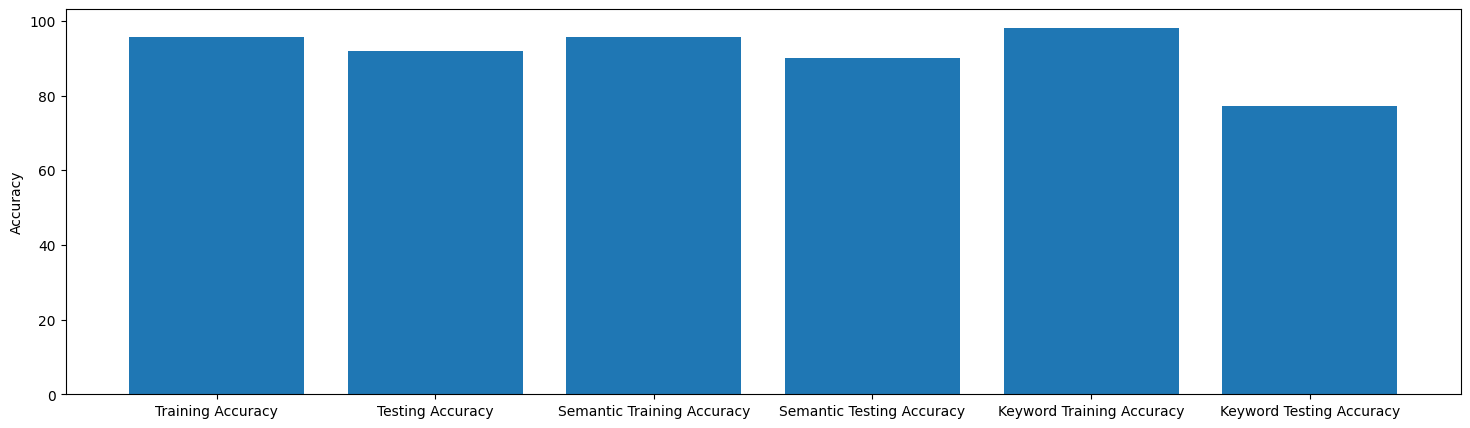

Training Accuracy 95.8
Testing Accuracy 91.9
Semantic Training Accuracy 95.8
Semantic Testing Accuracy 90.10000000000001
Keyword Training Accuracy 98.2
Keyword Testing Accuracy 77.2


In [387]:
import matplotlib.pyplot as plt
# Create the plot
plt.subplots(figsize=(18,5))

plt.bar(['Training Accuracy', 'Testing Accuracy', 'Semantic Training Accuracy','Semantic Testing Accuracy','Keyword Training Accuracy','Keyword Testing Accuracy'], [training_accuracy,testing_accracy,semantic_training,semantic_testing,keyword_training,keyword_testing])

# Add a label to the y-axis
plt.ylabel('Accuracy')

# Show the plot
plt.show()
print('Training Accuracy',training_accuracy)
print('Testing Accuracy',testing_accracy)
print('Semantic Training Accuracy',semantic_training)
print('Semantic Testing Accuracy',semantic_testing)
print('Keyword Training Accuracy',keyword_training)
print('Keyword Testing Accuracy',keyword_testing)

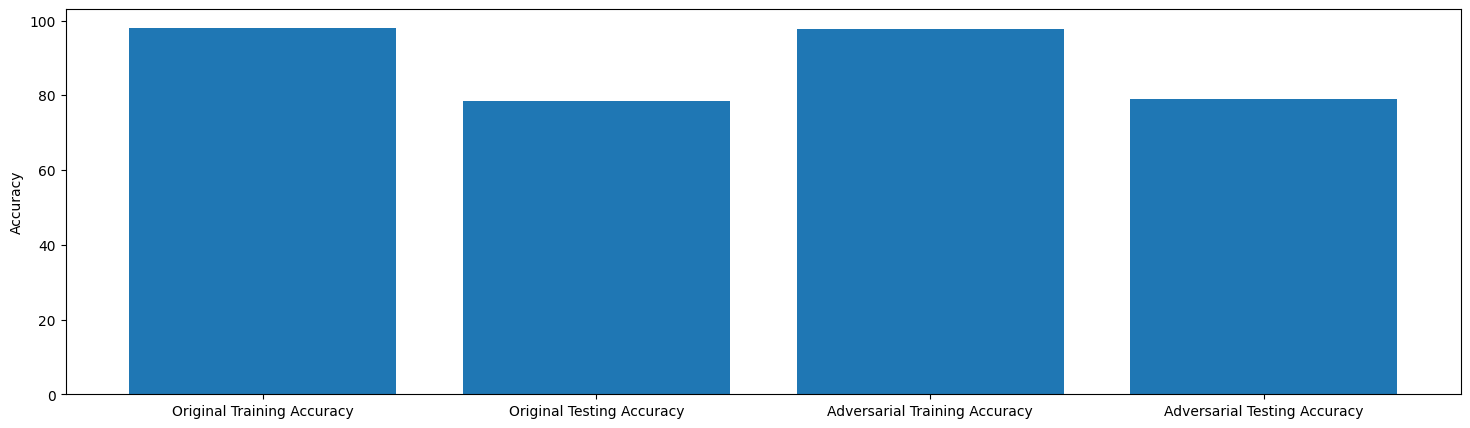

Original Training Accuracy 98.1
Original Testing Accuracy 78.4
Adversarial Training Accuracy 97.7
Adversarial Testing Accuracy 79.10000000000001


In [388]:
import matplotlib.pyplot as plt
# Create the plot
plt.subplots(figsize=(18,5))

plt.bar([ 'Original Training Accuracy','Original Testing Accuracy','Adversarial Training Accuracy','Adversarial Testing Accuracy'], [original_training,original_testing,adversarial_training,adversarial_testing])

# Add a label to the y-axis
plt.ylabel('Accuracy')

# Show the plot
plt.show()
print('Original Training Accuracy',original_training)
print('Original Testing Accuracy',original_testing)
print('Adversarial Training Accuracy',adversarial_training)
print('Adversarial Testing Accuracy',adversarial_testing)